# Sample IBM circuit

[source](https://docs.quantum.ibm.com/migration-guides/v2-primitives)

In [1]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
import numpy as np
from qiskit.circuit import QuantumCircuit, ParameterVector

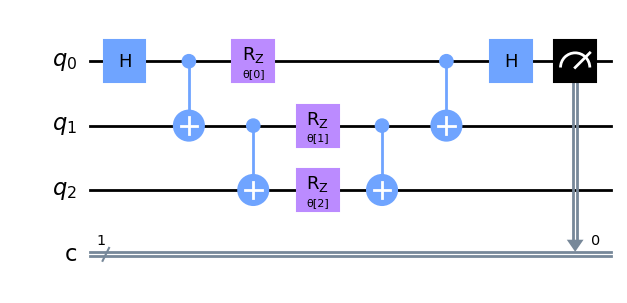

In [2]:

n = 3
thetas = ParameterVector('θ',n)

theta_values = [np.pi/2, np.pi/2, np.pi/2]
 
qc = QuantumCircuit(n, 1)
qc.h(0)
 
for i in range(n-1):
    qc.cx(i, i+1)
 
for i,t in enumerate(thetas):
    qc.rz(t, i)
 
for i in reversed(range(n-1)):
    qc.cx(i, i+1)
 
qc.h(0)
qc.measure(0, 0)
 
qc.draw("mpl", style="clifford")

In [3]:
from qiskit_aer import AerSimulator # former import: from qiskit import Aer
 
# Get local simulator backend
backend = AerSimulator()
 
# Run
result = backend.run(qc)

In [4]:
#result = backend.run(qc, shots=1024).result()
counts = result.get_counts(qc)#print(counts)

In [5]:
result